In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation as Animate
from matplotlib.animation import FFMpegWriter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pdb

In [2]:
xi_max = 10
eta_max = 1

xi_div = 501
eta_div = 51

xi_vec = np.linspace(0,xi_max,xi_div)
eta_vec = np.linspace(0,eta_max,eta_div)

marker = np.full((xi_div,eta_div),1)

xi_grid,eta_grid = np.meshgrid(xi_vec,eta_vec,indexing='ij')

# Plot the Discretized Domain in X, Y

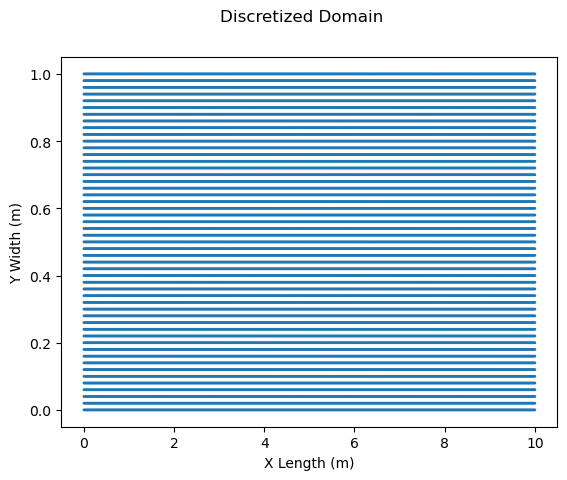

In [3]:
fig, ax = plt.subplots()
#fig.set_size_inches(6, 3)
scatter = ax.scatter(xi_grid,eta_grid,marker)
#ax.set_xlim([-0.1,25])
#ticks = ax.set_xticks(np.arange(0,2.2,0.2))
label = ax.set_xlabel('X Length (m)')
#ax.set_ylim([-0.1,4])
#ticks = ax.set_yticks(np.arange(0,1.2,0.2))
label = ax.set_ylabel('Y Width (m)')
text = fig.suptitle(r'Discretized Domain') 

# Plot the Discretized Domain in ${\xi}, {\eta}$

In [3]:
with open('./EulerNozzle/2000_tstep_501_251_00001t.dat', 'rb') as f:
    P_stor = np.load(f)
#[0] -> rho
#[1] -> u
#[2] -> v
#[3] -> p
#[4] -> T
rho = P_stor[:, :, 0, :]
u = P_stor[:, :, 1, :]
v = P_stor[:, :, 2, :]
p = P_stor[:, :, 3, :]
T = P_stor[:, :, 4, :]
xi_max = 3
eta_max = 1
xi_div = 501
eta_div = 251
dxi = xi_max / (xi_div - 1)
deta = eta_max / (eta_div - 1)
dt = 0.0001



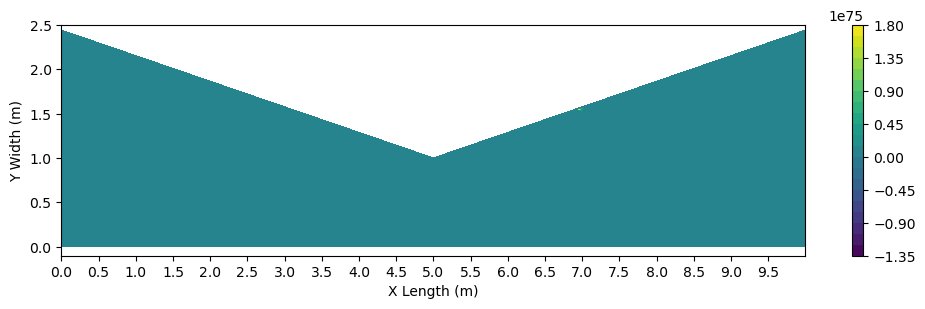

In [18]:
fig, ax = plt.subplots()
#contours = ax.contourf(x_grid,y_grid,rho[:, :, 60],levels = np.linspace(-1,0))
contours = ax.contourf(x_grid,y_grid,rho[:, :, 1000],25)
cbar = fig.colorbar(contours)
fig.set_size_inches(12, 3)
#ax.set_xlim([-0.1,10.1])
ticks = ax.set_xticks(np.arange(0,10,.5))
label = ax.set_xlabel('X Length (m)')
ax.set_ylim([-0.1,1.1])
ticks = ax.set_yticks(np.arange(0,2.6,0.5))
label = ax.set_ylabel('Y Width (m)')
#text = fig.suptitle(r'Nondimensional Density Distribution') 

In [16]:
fig.savefig('density_.pdf')

In [4]:
dt = 0.00001
C = ((np.sqrt(T[:,:,0])+np.sqrt(u[:,:,0]**2+v[:,:,0]**2))*dt)/dxi
#Ctest = 1/((np.abs(u)+np.sqrt(T))/dxi+(np.abs(v)+np.sqrt(T))/deta)


In [12]:
tsteps = 100
#Plotting function
from IPython.display import HTML
matplotlib.rcParams['animation.embed_limit'] = 1E9
fig, ax = plt.subplots()

fig.set_size_inches(12, 3)
text = fig.suptitle(r'Nondimensional Pressure')
fig.set_tight_layout(True) 
div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')
def plot_temp(i):
    ax.clear()
    time = 900*dt+dt*i
    contours = ax.contourf(x_grid,y_grid,p[:,:,900+i],25)
    cax.cla()
    fig.colorbar(contours, cax=cax)
    #ax.set_xlim([-0.1,10.1])
    ticks = ax.set_xticks(np.arange(0,10,.5))
    label = ax.set_xlabel('X Length (m)')
    ax.set_ylim([-0.1,1.1])
    ticks = ax.set_yticks(np.arange(0,2.6,0.5))
    label = ax.set_ylabel('Y Width (m)')
    # p= ax.contour(xv,yv,T[:,:,i],np.arange(0,160,10))
    # clabels = ax.clabel(p, inline=1, fontsize=10)
    # ax.set_xlim([-0.1,2.1])
    # ticks = ax.set_xticks(np.arange(0,2.2,0.2))
    # label = ax.set_xlabel('X Length (m)')
    # ax.set_ylim([-0.1,1.1])
    # ticks = ax.set_yticks(np.arange(0,1.2,0.2))
    # label = ax.set_ylabel('Y Width (m)')
    textstr = 't={0:.4f}s'.format(time)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.6, 0.75, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top',horizontalalignment='right', bbox=props)
    
totaltime = (dt*tsteps)
ani = Animate(fig, plot_temp, frames = tsteps+1, interval= 500, blit=False, repeat=False)

plt.close()
#HTML(ani.to_jshtml())
# f = r"/home/chrisbmiller/Documents/NYU/CFD/Project3/pressure_animation.mp4" 
# writermp4 = FFMpegWriter(fps=totaltime/30) 
# ani.save(f, writer=writermp4)

In [14]:
matplotlib.rcParams['animation.ffmpeg_path'] = r'/home/chrisbmiller/Documents/NYU/CFD/Project3/ffmpeg-6.1-amd64-static/ffmpeg'
f = r"/home/chrisbmiller/Documents/NYU/CFD/Project3/pressure_animation.mp4" 
writermp4 = FFMpegWriter(fps=10) 
ani.save(f, writer=writermp4)

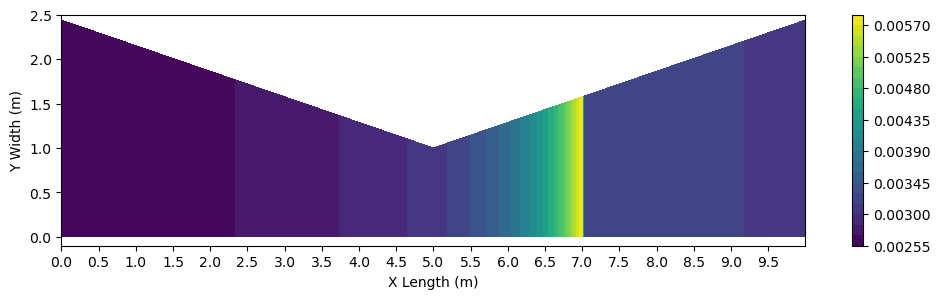

In [5]:
fig, ax = plt.subplots()
#contours = ax.contourf(x_grid,y_grid,rho[:, :, 60],levels = np.linspace(-1,0))
contours = ax.contourf(x_grid,y_grid,C,25)
cbar = fig.colorbar(contours)
fig.set_size_inches(12, 3)
#ax.set_xlim([-0.1,10.1])
ticks = ax.set_xticks(np.arange(0,10,.5))
label = ax.set_xlabel('X Length (m)')
ax.set_ylim([-0.1,1.1])
ticks = ax.set_yticks(np.arange(0,2.6,0.5))
label = ax.set_ylabel('Y Width (m)')
#text = fig.suptitle(r'Nondimensional Temperature Distribution') 

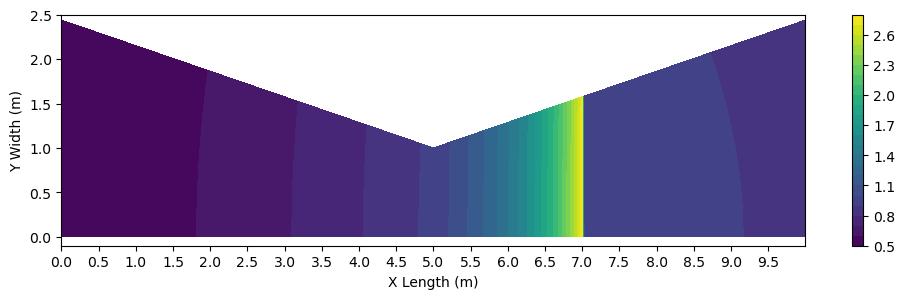

In [21]:
fig, ax = plt.subplots()
#contours = ax.contourf(x_grid,y_grid,rho[:, :, 60],levels = np.linspace(-1,0))
contours = ax.contourf(x_grid,y_grid,u[:, :, 0],25)
cbar = fig.colorbar(contours)
fig.set_size_inches(12, 3)
#ax.set_xlim([-0.1,10.1])
ticks = ax.set_xticks(np.arange(0,10,.5))
label = ax.set_xlabel('X Length (m)')
ax.set_ylim([-0.1,1.1])
ticks = ax.set_yticks(np.arange(0,2.6,0.5))
label = ax.set_ylabel('Y Width (m)')
#text = fig.suptitle(r'Nondimensional Temperature Distribution') 

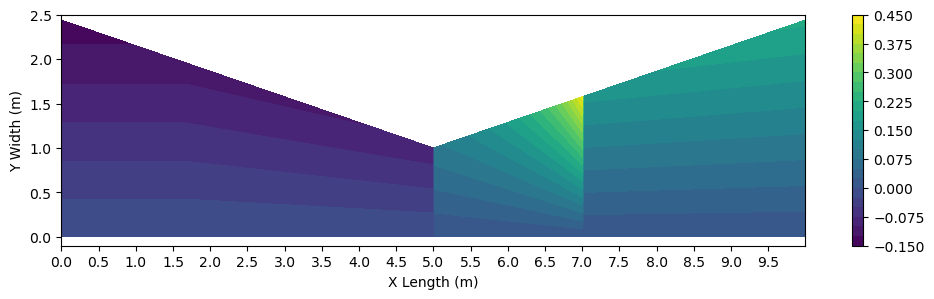

In [23]:
fig, ax = plt.subplots()
#contours = ax.contourf(x_grid,y_grid,rho[:, :, 60],levels = np.linspace(-1,0))
contours = ax.contourf(x_grid,y_grid,v[:, :, 0],25)
cbar = fig.colorbar(contours)
fig.set_size_inches(12, 3)
#ax.set_xlim([-0.1,10.1])
ticks = ax.set_xticks(np.arange(0,10,.5))
label = ax.set_xlabel('X Length (m)')
ax.set_ylim([-0.1,1.1])
ticks = ax.set_yticks(np.arange(0,2.6,0.5))
label = ax.set_ylabel('Y Width (m)')
#text = fig.suptitle(r'Nondimensional Temperature Distribution') 

In [6]:
fig.savefig('cfl_init.pdf')

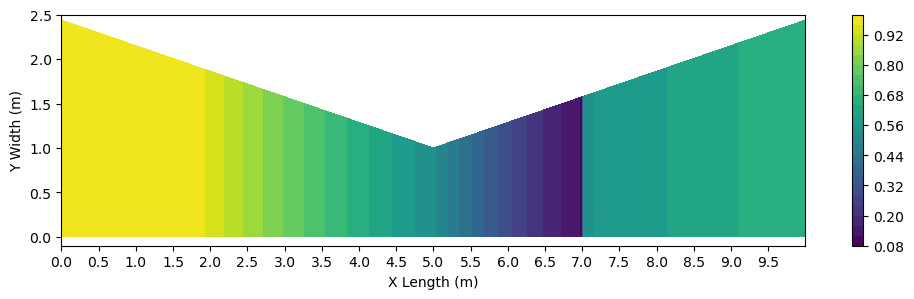

In [25]:
fig, ax = plt.subplots()
#contours = ax.contourf(x_grid,y_grid,rho[:, :, 60],levels = np.linspace(-1,0))
contours = ax.contourf(x_grid,y_grid,p[:, :, 0],25)
cbar = fig.colorbar(contours)
fig.set_size_inches(12, 3)
#ax.set_xlim([-0.1,10.1])
ticks = ax.set_xticks(np.arange(0,10,.5))
label = ax.set_xlabel('X Length (m)')
ax.set_ylim([-0.1,1.1])
ticks = ax.set_yticks(np.arange(0,2.6,0.5))
label = ax.set_ylabel('Y Width (m)')
#text = fig.suptitle(r'Nondimensional Temperature Distribution') 

In [26]:
fig.savefig('p_init.pdf')

In [163]:
np.argwhere(np.isnan(C[:,:,37]))

array([[350,   0],
       [350,   2],
       [350,   3],
       [350,   4],
       [350,   5],
       [350,   6],
       [350,   7],
       [350,   8],
       [350,   9],
       [350,  10],
       [350,  11],
       [350,  12],
       [350,  13],
       [350,  14],
       [350,  15],
       [350,  16],
       [350,  17],
       [350,  18],
       [350,  19],
       [350,  20],
       [350,  21],
       [350,  22],
       [350,  23],
       [350,  24],
       [350,  25],
       [350,  26],
       [350,  27],
       [350,  28],
       [350,  29],
       [350,  30],
       [350,  31],
       [350,  32],
       [350,  33],
       [350,  34],
       [350,  35],
       [350,  36],
       [350,  37],
       [350,  38],
       [350, 249]])

(-10.0, 10.0)

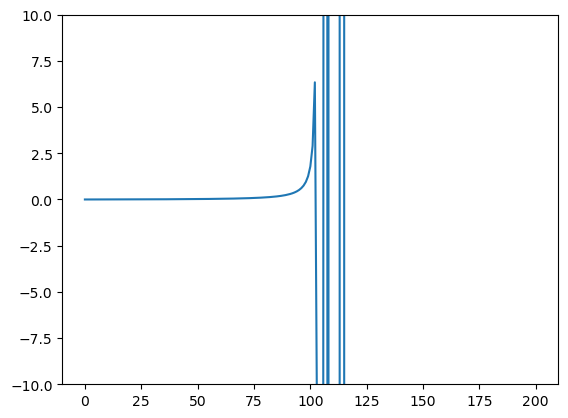

In [189]:
plt.plot(v[350,0,:])
plt.ylim((-10,10))

(-10.0, 10.0)

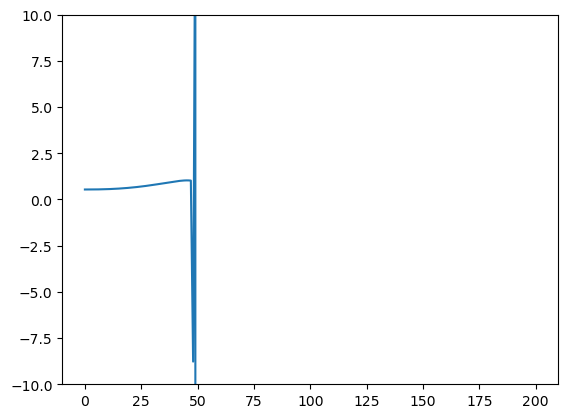

In [132]:
plt.plot(T[699,498,:])
plt.ylim((-10,10))

(-10.0, 10.0)

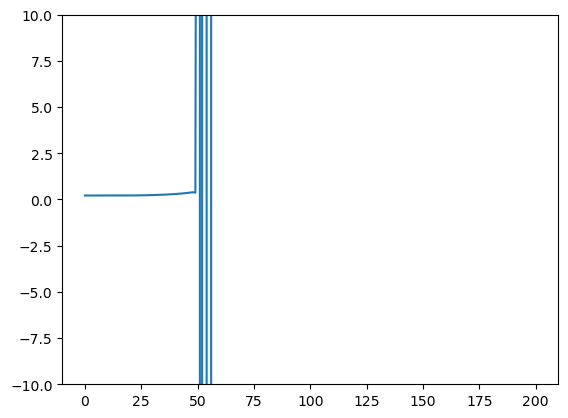

In [133]:
plt.plot(rho[699,498,:])
plt.ylim((-10,10))

(-10.0, 10.0)

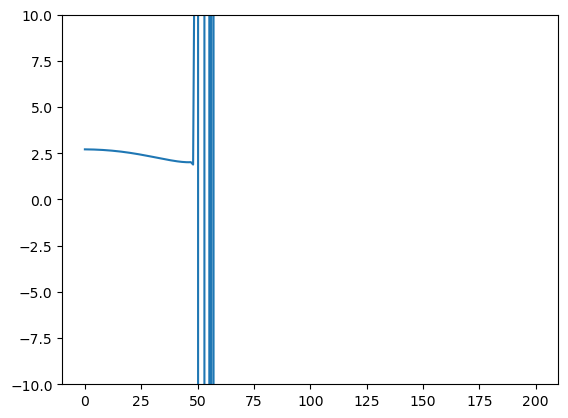

In [134]:
plt.plot(u[699,498,:])
plt.ylim((-10,10))

(-10.0, 10.0)

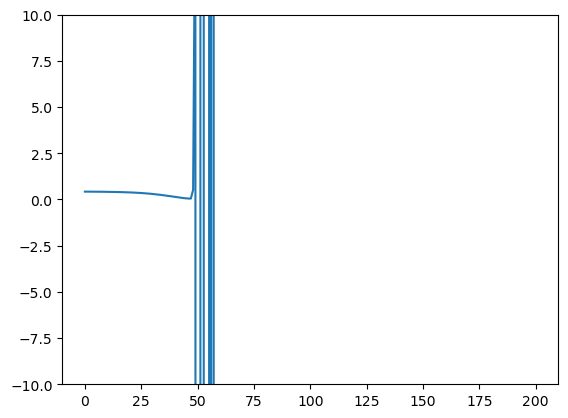

In [135]:
plt.plot(v[699,498,:])
plt.ylim((-10,10))

(-10.0, 10.0)

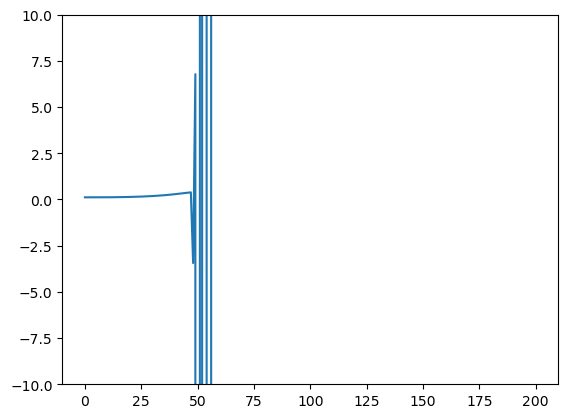

In [136]:
plt.plot(p[699,498,:])
plt.ylim((-10,10))

In [ ]:
#a = np.sqrt((1.4*p)/rho)
#c = ((a+u)*dt)/dxi


fig, ax = plt.subplots()
contours = ax.contourf(x_grid,y_grid,T[:, :, 7],25)
cbar = fig.colorbar(contours)
fig.set_size_inches(14, 8)
#ax.set_xlim([-0.1,2.1])
#ticks = ax.set_xticks(np.arange(0,2.2,0.2))
label = ax.set_xlabel('X Length (m)')
#ax.set_ylim([-0.1,1.1])
#ticks = ax.set_yticks(np.arange(0,1.2,0.2))
label = ax.set_ylabel('Y Width (m)')
text = fig.suptitle(r'temp') 

In [203]:
0.00001*4000

0.04

In [11]:
rho[140,0,0]

1.0

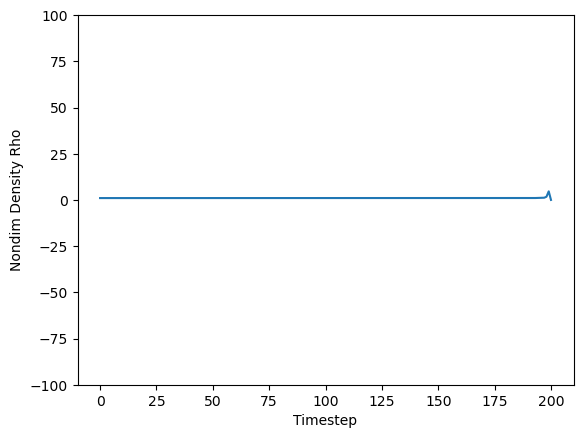

In [12]:
plt.plot(rho[700,0,:])
#plt.xlim([0,100])
plt.ylim([-100,100])
label = plt.xlabel('Timestep')
label = plt.ylabel('Nondim Density Rho')

In [44]:
with open('./EulerNozzle/TEST_U_before.dat', 'rb') as f:
    U = np.load(f)
g=1.4
U1 = U[:, :, 0]
U2 = U[:, :, 1]
U3 = U[:, :, 2]
U4 = U[:, :, 3]
U_step = np.empty((xi_div, eta_div, 5))
rho = U1 #rho
u = U2/U1 #u
v = U3/U1 #v
p = (g - 1) * (U4 - (g / 2) * ((U2**2 + U3**2) / U1)) #pressure
T = (g - 1) * (U4 / U1 - (g / 2) * ((U2**2 + U3**2) / U1**2)) #temperature



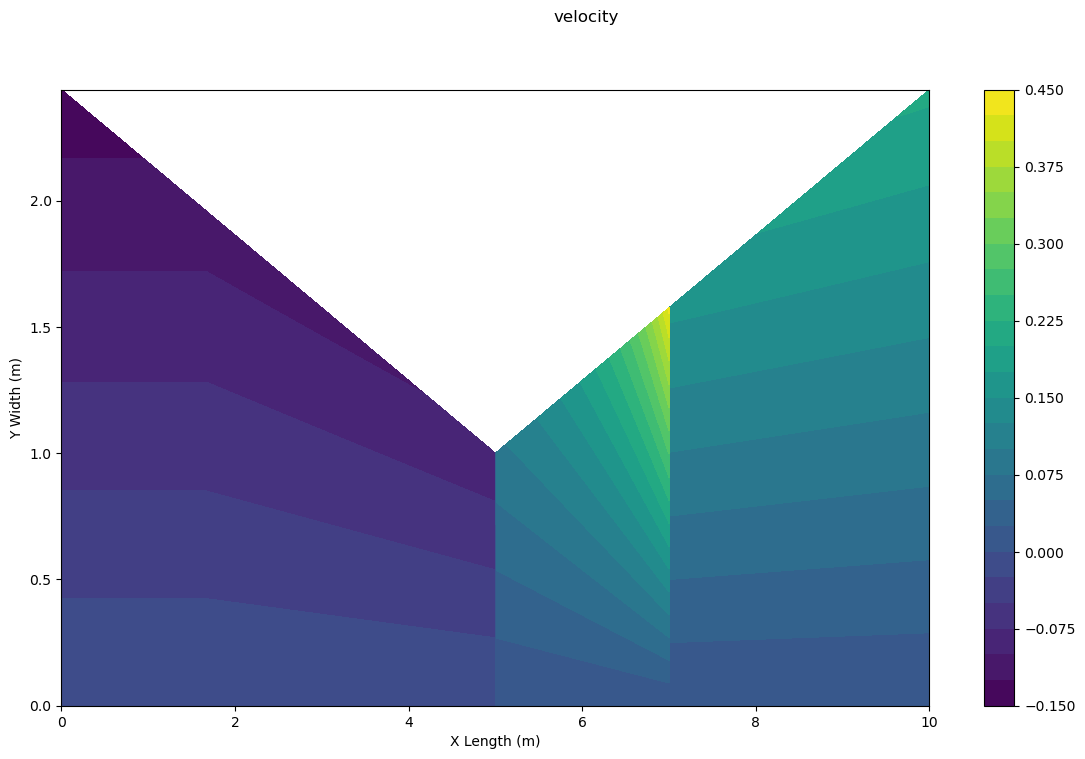

In [47]:
fig, ax = plt.subplots()
contours = ax.contourf(x_grid,y_grid,v,25)
cbar = fig.colorbar(contours)
fig.set_size_inches(14, 8)
#ax.set_xlim([-0.1,2.1])((xi_div-1)/2+1)
#ticks = ax.set_xticks(np.arange(0,2.2,0.2))
label = ax.set_xlabel('X Length (m)')
#ax.set_ylim([-0.1,1.1])
#ticks = ax.set_yticks(np.arange(0,1.2,0.2))
label = ax.set_ylabel('Y Width (m)')
text = fig.suptitle(r'velocity') 

In [42]:
s1 = 0.5 * (10 / 3)
s2 = 1.5 * (10 / 3)
s3 = 2.1 * (10 / 3)
s4 = 3 * (10 / 3)
x1 = np.linspace(0,s1)
rho1 = np.ndarray(x1.shape[0])
rho1.fill(1)

x2 = np.linspace(s1,s2)
rho2 = np.ndarray(x2.shape[0])
rho2 = 1.0-(0.366*(3/10))*(x2-s1)

x3 = np.linspace(s2,s3)
rho3 = np.ndarray(x3.shape[0])
rho3 = 0.634-(0.702*(3/10))*(x3-s2)

x4 = np.linspace(s3,s4)
rho4 = np.ndarray(x4.shape[0])
rho4 = 0.5892+(.10228*(3/10))*(x4-s3)

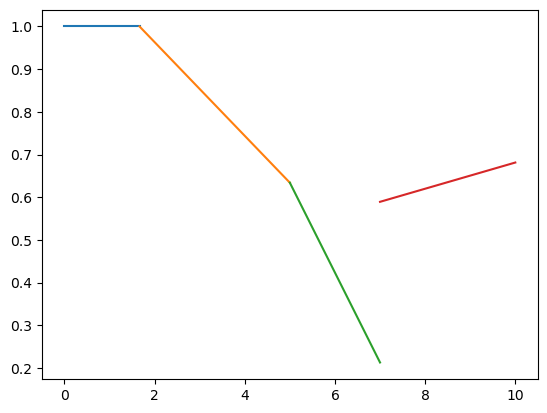

In [43]:
plt.plot(x1,rho1)
plt.plot(x2,rho2)
plt.plot(x3,rho3)
plt.plot(x4,rho4)

In [36]:
rho2[-1]

0.6340000000000001